## Equipo #4 | TC3006C.102

- Karla Andrea Palma Villanueva (A01754270)
- Viviana Alanis Fraige (A01236316)
- David Fernando Armendariz Torres (A01570813)
- Alan Alberto Mota Yescas (A01753924)
- Adrián Chávez Morales (A01568679)
- Jose Manuel Armendáriz Mena (A01197583)

In [1]:
# Import libraries
import pandas as pd # Dataframe management
import re # Regular expressions
import numpy as np # Math 
import matplotlib.pyplot as plt # Plots

#### Load Dataset

In [2]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Análisis preliminar de variables de interés

In [5]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [8]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

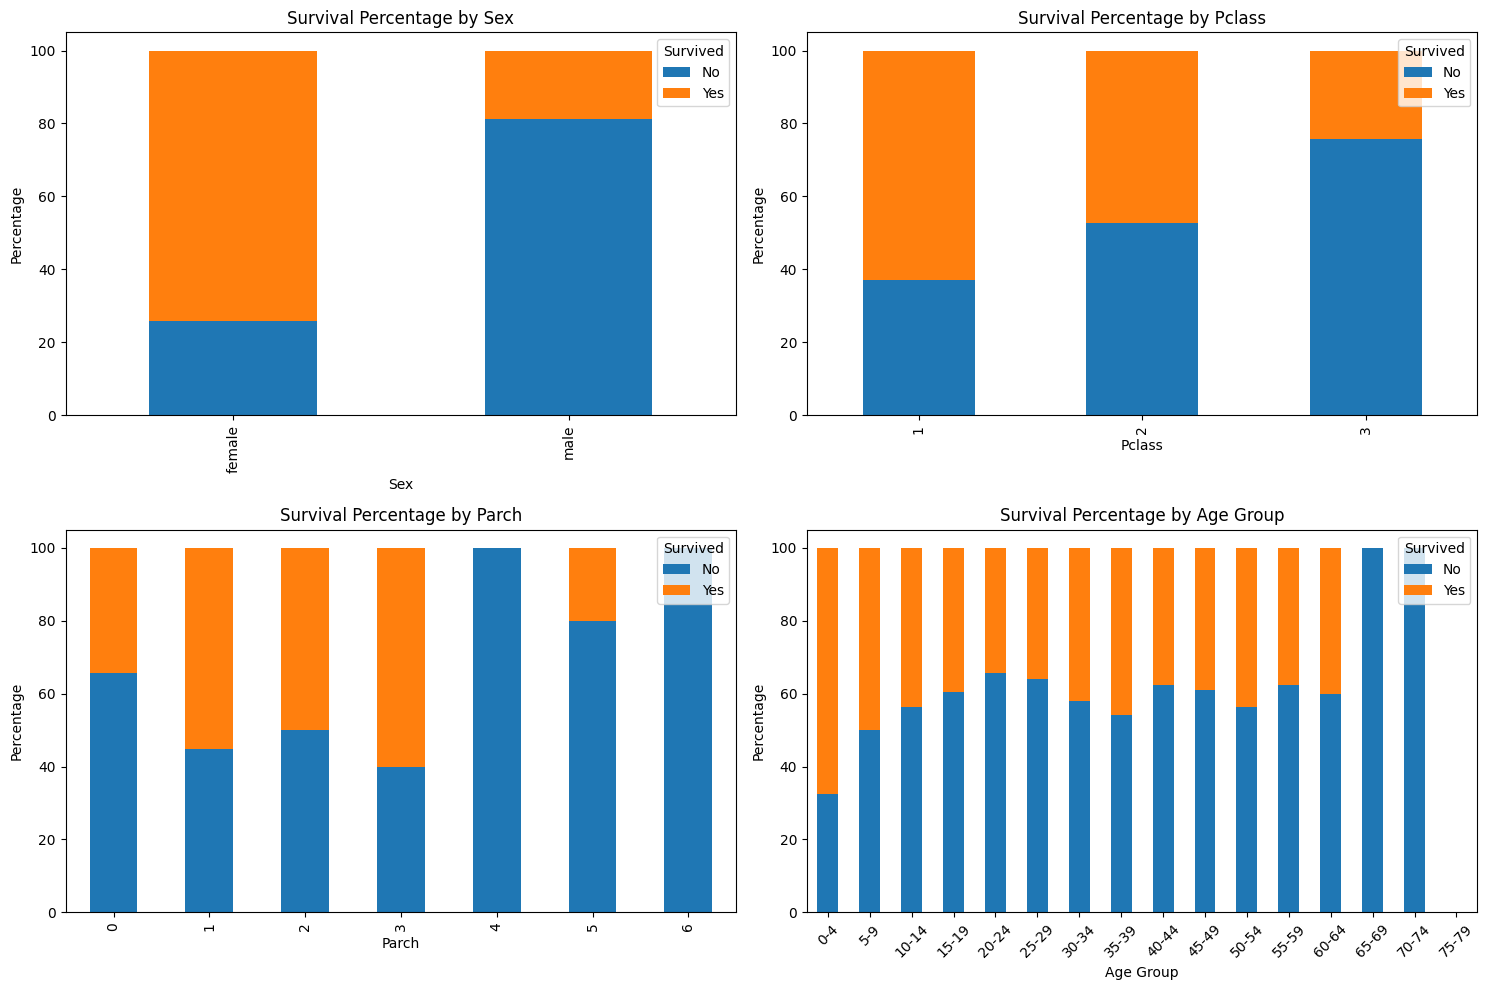

In [10]:
# Create age bins
bins = range(0, 85, 5)  # Adjust the range and interval as needed
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Function to calculate percentages
def calculate_percentages(data, column):
    counts = data.groupby([column, 'Survived']).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    return percentages

# Calculate percentages for each plot
sex_percentages = calculate_percentages(df, 'Sex')
pclass_percentages = calculate_percentages(df, 'Pclass')
parch_percentages = calculate_percentages(df, 'Parch')
age_group_percentages = calculate_percentages(df, 'AgeGroup')

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Survival Percentage by Sex
sex_percentages.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Survival Percentage by Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(title='Survived', labels=['No', 'Yes'])

# Plot 2: Survival Percentage by Pclass
pclass_percentages.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Survival Percentage by Pclass')
axes[0, 1].set_xlabel('Pclass')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='Survived', labels=['No', 'Yes'])

# Plot 3: Survival Percentage by Parch
parch_percentages.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Survival Percentage by Parch')
axes[1, 0].set_xlabel('Parch')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='Survived', labels=['No', 'Yes'])

# Plot 4: Survival Percentage by Age Group
age_group_percentages.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Survival Percentage by Age Group')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='Survived', labels=['No', 'Yes'])
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()